<a href="https://colab.research.google.com/github/syedsharin/Almabetter-EDA/blob/first-commit/Hotel_Booking_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions!

## <b>This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. </b>

## <b> Explore and analyze the data to discover important factors that govern the bookings. </b>

### In this Eploratory data analysis , we will analyse the each columns to find answer for some  questions. First we have to understand the data and gather as many intuitions . 

###The first step in EDA is data preperation and cleaning 

In [ ]:
#Import the main libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [ ]:
#download the data set and read it as pandas data frame 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Import hotel booking csv as df

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Copy of Hotel Bookings (1).csv')

# **Data Preparation and Cleaning**

In [ ]:
#Just see the columns and first few rows from the data frame 
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,0.0,0,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [ ]:
# To see all the columns in the data frame
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

#Finding Numbers of Columns,Rows ,Columns with Null or Missing values and other related information 

In [ ]:
#Find out the data type of each column 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Create kids column adding babies and children**

In [ ]:
# create a kids columns from babies and children
df['kids']= df['babies']+df['children']

# **Drop unwanted columns**

In [ ]:
# droping unwanted columns 
df.drop(['company','agent','babies','children'], axis = 1,inplace = True)

**Dataset is having 119390 rows and 29 columns**

**Droping Duplicates from data set**

In [ ]:
# drop duplicate values in data frame
df = df.drop_duplicates()

In [ ]:
df.shape 

(87369, 29)

**Finding missing values from our dataset.**

In [ ]:
#check null values in Data frame
df.isnull().sum()

hotel                               0
is_canceled                         0
lead_time                           0
arrival_date_year                   0
arrival_date_month                  0
arrival_date_week_number            0
arrival_date_day_of_month           0
stays_in_weekend_nights             0
stays_in_week_nights                0
adults                              0
meal                                0
country                           452
market_segment                      0
distribution_channel                0
is_repeated_guest                   0
previous_cancellations              0
previous_bookings_not_canceled      0
reserved_room_type                  0
assigned_room_type                  0
booking_changes                     0
deposit_type                        0
days_in_waiting_list                0
customer_type                       0
adr                                 0
required_car_parking_spaces         0
total_of_special_requests           0
reservation_

**Drop null values from the data set**

In [ ]:
df.dropna(inplace=True)

In [ ]:
df.shape

(86913, 29)

**After cleaning the data we have 86913 rows and 29 columns**

In [ ]:
#lets see columns name
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'meal', 'country', 'market_segment',
       'distribution_channel', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type',
       'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date', 'kids'],
      dtype='object')

**Lets give a closer look to what we have.**

In [ ]:
#View some statistical details
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,kids
count,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000,86913.000000
mean,0.275943,80.202260,2016.211856,26.841646,15.818301,1.007559,2.628951,1.878603,0.039246,0.030237,0.176763,0.271904,0.753731,106.581162,0.083474,0.699539,0.150058
std,0.446991,86.103281,0.685980,13.654184,8.834477,1.028821,2.043871,0.625884,0.194181,0.369631,1.718149,0.728177,10.043367,54.959822,0.280441,0.831884,0.472662
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000
25%,0.000000,12.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,72.250000,0.000000,0.000000,0.000000
50%,0.000000,50.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,98.410000,0.000000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,134.100000,0.000000,1.000000,0.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,10.000000


**Here we can see some outliers.**

**Lets build boxplots to see it better.**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass t

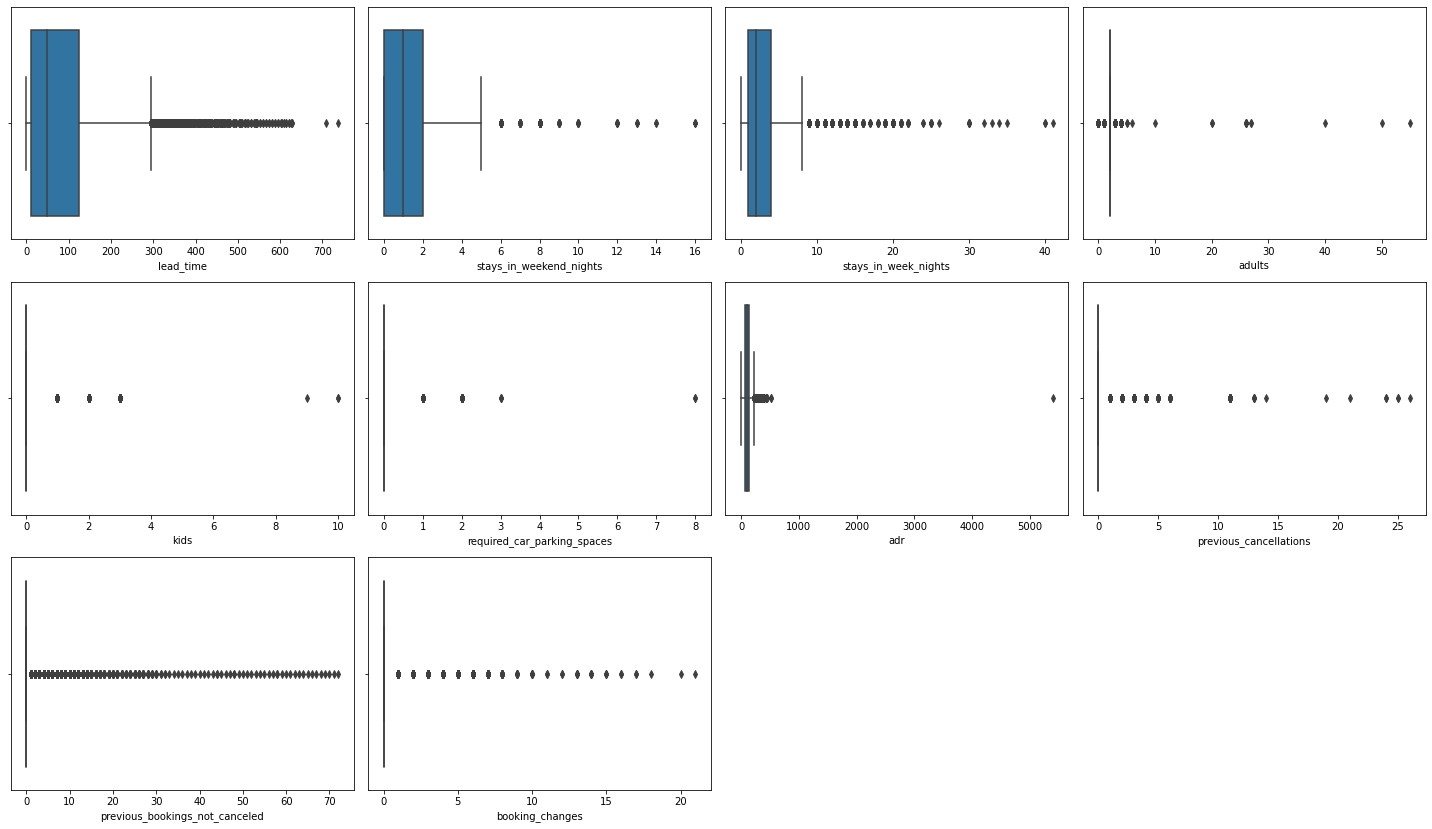

In [ ]:
# check outliers in numerical columns with seaborn boxplot
columns = ['lead_time', 'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'kids', 'required_car_parking_spaces', 'adr', 'previous_cancellations', 'previous_bookings_not_canceled', 'booking_changes']
n = 1
plt.figure(figsize=(20,15))

for column in columns:
  plt.subplot(4,4,n)
  n = n+1
  sns.boxplot(df[column])
  plt.tight_layout()

# **Lets use median for removing the outliers**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



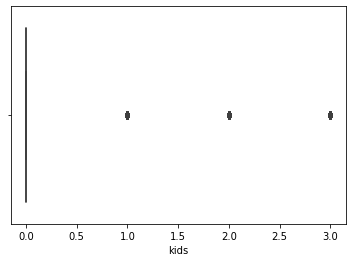

In [ ]:
#change the value which is greater than 8 to median of kids column
df.loc[df['kids']>3,'kids'] = df.loc[df['kids']<3,'kids'].median()
sns.boxplot(df['kids'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



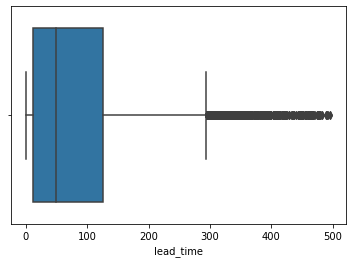

In [ ]:
#change the value which is greater than 500 to median of lead time column
df.loc[df['lead_time']>500,'lead_time'] = df.loc[df['lead_time']<500,'lead_time'].median()
sns.boxplot(df['lead_time'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



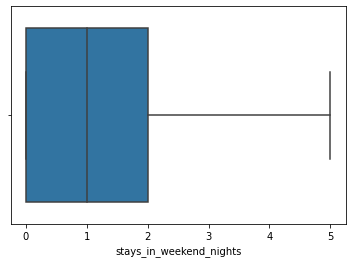

In [ ]:
#change the value which is greater than 10 to median of stays_in_weekend_nights column
df.loc[df['stays_in_weekend_nights']>5,'stays_in_weekend_nights'] = df.loc[df['stays_in_weekend_nights']<5,'stays_in_weekend_nights'].median()
sns.boxplot(df['stays_in_weekend_nights'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



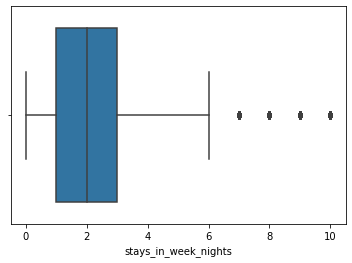

In [ ]:
#change the value which is greater than 10 to median of stays_in_week_nights column
df.loc[df['stays_in_week_nights']>10,'stays_in_week_nights'] = df.loc[df['stays_in_week_nights']<10,'stays_in_week_nights'].median()
sns.boxplot(df['stays_in_week_nights'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



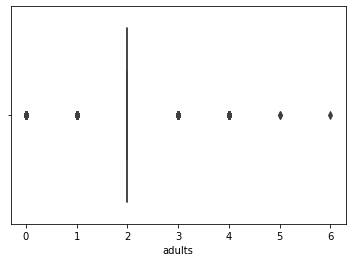

In [ ]:
#adults
df.loc[df['adults']>6,'adults'] = df.loc[df['adults']<6,'adults'].median()
sns.boxplot(df['adults'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



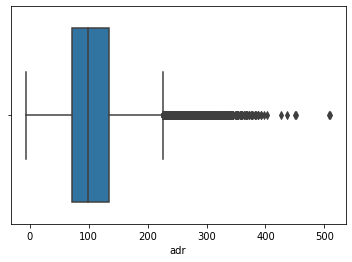

In [ ]:
#adr
df.loc[df['adr']>1000,'adr'] = df.loc[df['adr']<10,'adr'].median()
sns.boxplot(df['adr'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



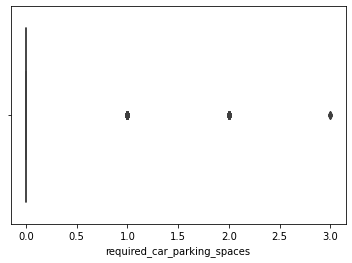

In [ ]:
#required_car_parking_spaces
df.loc[df['required_car_parking_spaces']>3,'required_car_parking_spaces'] = df.loc[df['required_car_parking_spaces']<3,'required_car_parking_spaces'].median()
sns.boxplot(df['required_car_parking_spaces'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



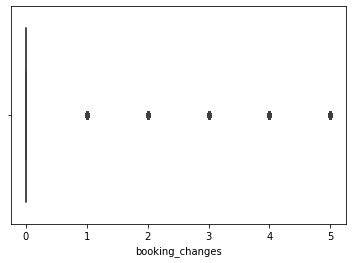

In [ ]:
#booking_changes
df.loc[df['booking_changes']>5,'booking_changes'] = df.loc[df['booking_changes']<10,'booking_changes'].median()
sns.boxplot(df['booking_changes'])

##Now our data is cleaned and lets dive deep into our data 

### Q1 - Which months have highest and lowest booking rates?



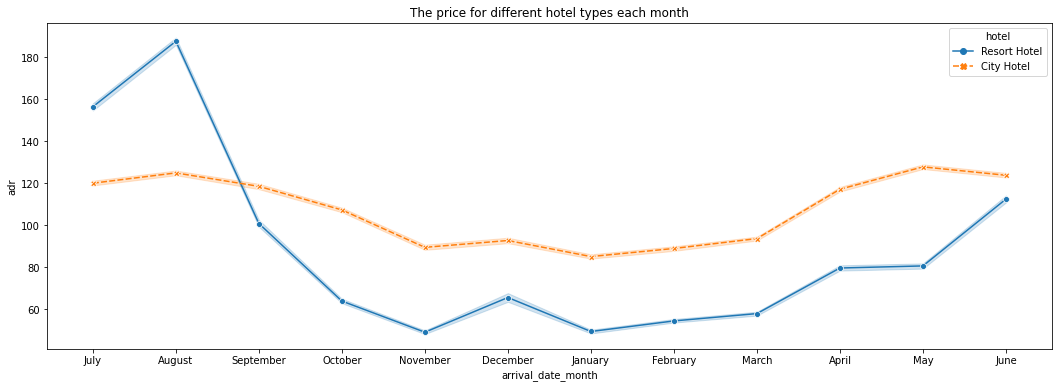

In [ ]:
#This is a lineplot of the adr for different hotel types
plt.figure(figsize=(18,6))
sns.lineplot(x='arrival_date_month', y='adr', hue='hotel', data= df,style="hotel", markers=True ).set(title = 'The price for different hotel types each month')
plt.show()

From graph we can conclude,both city and resort hotels,from November to january have lowest and August have highest average daily rates

###Q2. Through which market segment the customer have to  wait more for confirming their booking ?

**Market Segment and days in waiting list**


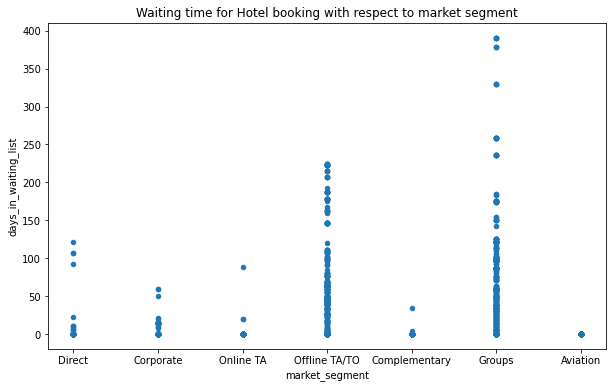

In [ ]:
#This is a scatter plot for Market segment and days_in_waiting_list 

df.plot.scatter(x='market_segment', y = 'days_in_waiting_list' , figsize = (10,6), title = 'Waiting time for Hotel booking with respect to market segment' , xlabel = 'Market segment', ylabel = 'Days in waiting list')
plt.show()


**From the graph we can conclude that through the 'Groups' market segment** **customers get to  wait for more time**

###Q3.Which type of Hotel is preffered by the customers?

In [ ]:
# booking count of resort hotel in 2015
resort_hotel_2015 = df.loc[(df['hotel']=="Resort Hotel") & (df['arrival_date_year']== 2015)].hotel.value_counts()
print(resort_hotel_2015)
# booking count of resort hotel in 2016
resort_hotel_2016 = df.loc[(df['hotel']=="Resort Hotel") & (df['arrival_date_year']== 2016)].hotel.value_counts()
print(resort_hotel_2016)
# booking count of resort hotel in 2017
resort_hotel_2017 = df.loc[(df['hotel']=="Resort Hotel") & (df['arrival_date_year']== 2017)].hotel.value_counts()
print(resort_hotel_2017)

# booking count of city hotel in 2015
city_hotel_2015 = df.loc[(df['hotel']=="City Hotel") & (df['arrival_date_year']== 2015)].hotel.value_counts()
print(city_hotel_2015)
# booking count of city hotel in 2016
city_hotel_2016 = df.loc[(df['hotel']=="City Hotel") & (df['arrival_date_year']== 2016)].hotel.value_counts()
print(city_hotel_2016)

# booking count of city hotel in 2017
city_hotel_2017 = df.loc[(df['hotel']=="City Hotel") & (df['arrival_date_year']== 2017)].hotel.value_counts()
print(city_hotel_2017)

Resort Hotel    6650
Name: hotel, dtype: int64
Resort Hotel    15365
Name: hotel, dtype: int64
Resort Hotel    11495
Name: hotel, dtype: int64
City Hotel    6543
Name: hotel, dtype: int64
City Hotel    26749
Name: hotel, dtype: int64
City Hotel    20111
Name: hotel, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



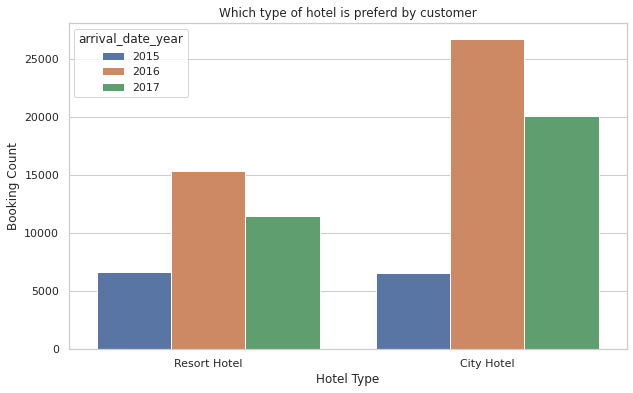

In [ ]:
#This is a countplot of Hotel type and arrival_date year 
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
sns.countplot(df.hotel, hue=df.arrival_date_year).set(title = 'Which type of hotel is preferd by customer', ylabel = 'Booking Count', xlabel = 'Hotel Type');



###From the above graph we can conclude that more number of customers preffered city hotel and in 2016 Both Hotels got maximum business

###Q4.Which is the Busiest month ?

[Text(66.5, 0.5, 'Arrival Month'),
 Text(0.5, 30.5, 'Hotel Type'),
 Text(0.5, 1.0, 'which is the busiest month')]

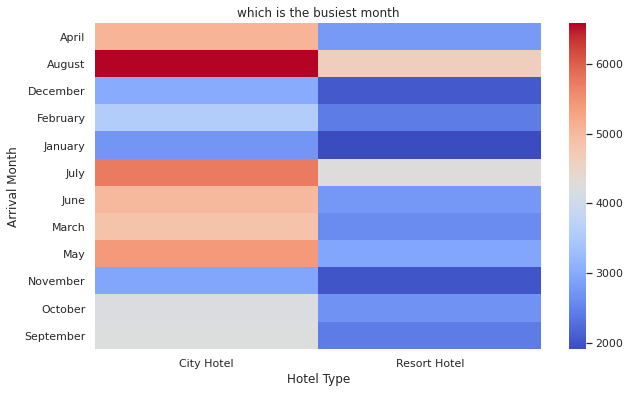

In [ ]:
# This is a Heatmap plot to find the busiest month
plt.figure(figsize=(10, 6))
sns.heatmap(pd.crosstab(df.arrival_date_month, df.hotel), cmap='coolwarm').set(title = 'which is the busiest month',xlabel = 'Hotel Type', ylabel = 'Arrival Month')


###We founds that for both the hotels , the busiest month is August 

In [ ]:
# august month total booking of each hotel
city_hotel_august = df.loc[(df['hotel']=="City Hotel") & (df['arrival_date_month']== 'August')].hotel.value_counts()
print(city_hotel_august)

# august month total booking of each hotel
resort_hotel_august = df.loc[(df['hotel']=="Resort Hotel") & (df['arrival_date_month']== 'August')].hotel.value_counts()
print(resort_hotel_august)

City Hotel    6586
Name: hotel, dtype: int64
Resort Hotel    4643
Name: hotel, dtype: int64


###Q5.How many bookings made by each hotel every month?

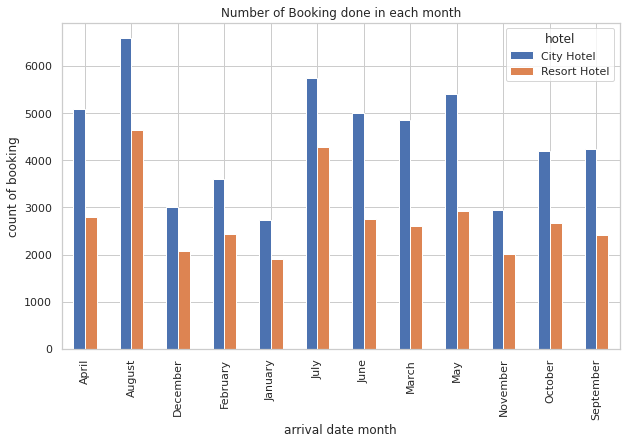

In [ ]:
# This is a barplot to find the number of bookings in each month
bar = df.groupby(['arrival_date_month', 'hotel']).size().unstack()
bar.plot.bar(title = 'Number of Booking done in each month' , xlabel = 'arrival date month' , ylabel = 'count of booking' , figsize = (10,6));

**From the above bar plot we can see that number of bookings made by city and** **resort hotels during each month. Every month city hotel get more booking than** **resort hotel and it is maximum during August**

###Q6.Which is the most preffered business segment ?

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



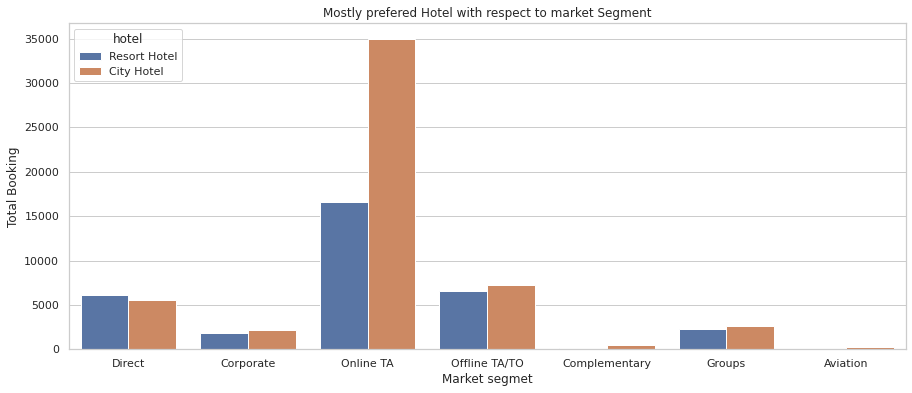

In [ ]:
 # This is a Count plot for finding most prefered market segment 
 fig_dims = (15, 6)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(df.market_segment,hue= df.hotel,ax=ax).set(title = 'Mostly prefered Hotel with respect to market Segment', xlabel = 'Market segmet' , ylabel ='Total Booking');


**For both type of hotel, customer prefer 'online TA' segment for booking**

In [ ]:
# Total booking done by Online TA
df.loc[df['market_segment']=='Online TA'].hotel.value_counts()

City Hotel      34984
Resort Hotel    16549
Name: hotel, dtype: int64

###Q7.Which are the most common country of origin of guests?

In [ ]:
# This is pie chart to find the country of origin of guests

# get number of acutal guests by country
country_data = pd.DataFrame(df.loc[df["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

# pie plot
fig = px.pie(country_data,
             values="Number of Guests",
             names="country",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show()


**As we can see Portugal comes in first position with 17652 count, then Great** **Britain comes second with 8446 count , and France with 7104, and so on .** 

###Q8. Finding bookings done by each market segment

In [ ]:
# This is the pie chart to find bookings per market segment
segments=df["market_segment"].value_counts()

# pie plot
fig = px.pie(segments,
             values=segments.values,
             names=segments.index,
             title="Bookings per market segment",
             template="seaborn")
fig.update_traces(rotation=-90, textinfo="percent+label")
fig.show()

**From the chart we found that maximum bookings are done by Online TA **

In [ ]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,assigned_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,kids
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,BB,PRT,Direct,Direct,0,0,0,C,C,3,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
1,Resort Hotel,0,49,2015,July,27,1,0,0,2,BB,PRT,Direct,Direct,0,0,0,C,C,4,No Deposit,0,Transient,0.0,0,0,Check-Out,2015-07-01,0.0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,BB,GBR,Direct,Direct,0,0,0,A,C,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,BB,GBR,Corporate,Corporate,0,0,0,A,A,0,No Deposit,0,Transient,75.0,0,0,Check-Out,2015-07-02,0.0
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,BB,GBR,Online TA,TA/TO,0,0,0,A,A,0,No Deposit,0,Transient,98.0,0,1,Check-Out,2015-07-03,0.0


###Q9.How many adults and kids guests arrived per month in each hotels ?

In [ ]:
#Total bookings
total_bookings = df.groupby(['hotel','arrival_date_month'])['adults','kids'].sum().reset_index()
total_bookings

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,hotel,arrival_date_month,adults,kids
0,City Hotel,April,9805,785.0
1,City Hotel,August,13188,1532.0
2,City Hotel,December,5688,522.0
3,City Hotel,February,6576,518.0
4,City Hotel,January,4801,323.0
5,City Hotel,July,11535,1201.0
6,City Hotel,June,9447,575.0
7,City Hotel,March,8989,462.0
8,City Hotel,May,9993,493.0
9,City Hotel,November,4999,182.0


In [ ]:
# only Resort bookings
resort = total_bookings.loc[(total_bookings["hotel"] == "Resort Hotel")]
# sort arrival date month column by month wise
resort['arrival_date_month'] = pd.Categorical(resort['arrival_date_month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
resort.sort_values(by = 'arrival_date_month',inplace=True)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
print(resort['adults'].max())
print(resort['kids'].max())

9463
1400.0


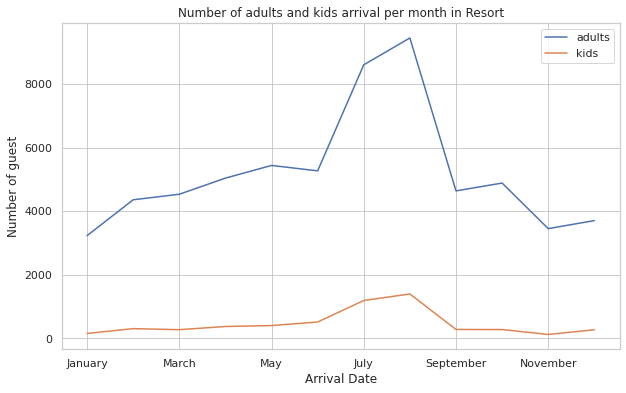

In [ ]:
#Line plot for finding the number of adults and kids -Resort hotel
resort.plot(x = 'arrival_date_month',y= ['adults','kids'],figsize=(10, 6), title = 'Number of adults and kids arrival per month in Resort', xlabel = 'Arrival Date', ylabel = 'Number of guest');

In [ ]:
# city hotel total bookings month wise
city_hotel = total_bookings.loc[(total_bookings['hotel']=='City Hotel')]
# sort arrival date month column by month wise
city_hotel['arrival_date_month'] = pd.Categorical(city_hotel['arrival_date_month'], ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])
city_hotel.sort_values(by = 'arrival_date_month',inplace=True)
city_hotel

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,hotel,arrival_date_month,adults,kids
4,City Hotel,January,4801,323.0
3,City Hotel,February,6576,518.0
7,City Hotel,March,8989,462.0
0,City Hotel,April,9805,785.0
8,City Hotel,May,9993,493.0
6,City Hotel,June,9447,575.0
5,City Hotel,July,11535,1201.0
1,City Hotel,August,13188,1532.0
11,City Hotel,September,7623,382.0
10,City Hotel,October,7566,441.0


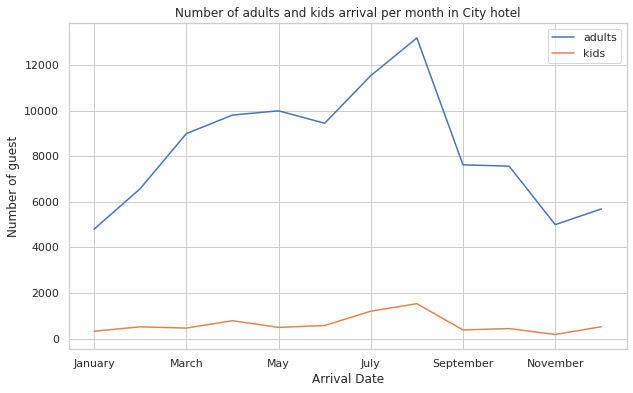

In [ ]:
#Line plot for finding the number of adults and kids -City hotel
city_hotel.plot(x = 'arrival_date_month',y= ['adults','kids'],figsize=(10, 6),title = 'Number of adults and kids arrival per month in City hotel', xlabel = 'Arrival Date', ylabel = 'Number of guest');


###The number of adults and kids in Resort Hotel in August month is 9463 and 1400 count, and for City Hotel its 13188 adults and 1532 kids.It seems that the number of adults and children are higher in case of city hotel . This means that city hotels is better choice for large families.